## EXPERIMENT 7 (A)

In [2]:
import yfinance as yf

# Download historical data
nifty50 = yf.download('^NSEI', start='2014-01-01', end='2023-12-31', auto_adjust=True)
tatastl = yf.download('TATASTEEL.NS', start='2014-01-01', end='2023-12-31', auto_adjust=True)
reliance = yf.download('RELIANCE.NS', start='2014-01-01', end='2023-12-31', auto_adjust=True)
hul = yf.download('HINDUNILVR.NS', start='2014-01-01', end='2023-12-31', auto_adjust=True)
tatacomm = yf.download('TATACOMM.NS', start='2014-01-01', end='2023-12-31', auto_adjust=True)
finolex = yf.download('FINCABLES.NS', start='2014-01-01', end='2023-12-31', auto_adjust=True)

# Save closing prices to CSV
nifty50[['Close']].to_csv('nifty50.csv')
tatastl[['Close']].to_csv('tatastl.csv')
reliance[['Close']].to_csv('reliance.csv')
hul[['Close']].to_csv('hul.csv')
tatacomm[['Close']].to_csv('tatacomm.csv')
finolex[['Close']].to_csv('finolex.csv')

csv_files = ['nifty50.csv', 'tatastl.csv', 'reliance.csv', 'hul.csv', 'tatacomm.csv', 'finolex.csv']
combined_data = pd.concat((pd.read_csv(f, index_col=0) for f in csv_files), axis=1)
combined_data.columns = ['NIFTY 50', 'Tata Steel', 'Reliance Industries', 'Hindustan Unilever', 'Tata Communications', 'Finolex Cables']

# Save the combined data to a single CSV file
combined_data.to_csv('stock_data_combined.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##(B)

In [3]:
import pandas as pd

# Read the combined dataset
combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)

# Display the entire dataset
print(combined_data)

                                   NIFTY 50          Tata Steel  \
Price                                                             
Ticker                                ^NSEI        TATASTEEL.NS   
Date                                    NaN                 NaN   
2014-01-02 00:00:00+00:00  6221.14990234375   14.07363510131836   
2014-01-03 00:00:00+00:00  6211.14990234375  13.848695755004883   
2014-01-06 00:00:00+00:00   6191.4501953125  13.707693099975586   
...                                     ...                 ...   
2016-08-12 00:00:00+00:00               NaN  13.511850357055664   
2018-01-01 00:00:00+00:00               NaN   26.50337791442871   
2019-01-01 00:00:00+00:00               NaN   20.22003936767578   
2019-10-27 00:00:00+00:00               NaN  14.683945655822754   
2020-11-14 00:00:00+00:00               NaN  20.314449310302734   

                          Reliance Industries  Hindustan Unilever  \
Price                                                      

<ipython-input-3-c873e7f97713>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)


##(C)

In [4]:
import pandas as pd

# Read the combined dataset
combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)

# Check for non-numeric columns and drop them if necessary
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Apply a 20-tap moving average filter to each column and create new columns for filtered data
for column in combined_data.columns:
    combined_data[f'Filtered Data {column}'] = combined_data[column].rolling(window=20).mean()

# Remove the first 20 values from the original data
filtered_combined_data = combined_data.iloc[20:]

# Display the updated DataFrame with filtered data
print(filtered_combined_data)


                              NIFTY 50  Tata Steel  Reliance Industries  \
Price                                                                     
2014-01-28 00:00:00+00:00  6126.250000   12.309393           171.835373   
2014-01-29 00:00:00+00:00  6120.250000   12.018992           170.157394   
2014-01-30 00:00:00+00:00  6073.700195   11.634586           167.798019   
2014-01-31 00:00:00+00:00  6089.500000   11.953526           169.048889   
2014-02-03 00:00:00+00:00  6001.799805   11.518761           166.964142   
...                                ...         ...                  ...   
2016-08-12 00:00:00+00:00          NaN   13.511850           222.836441   
2018-01-01 00:00:00+00:00          NaN   26.503378           397.710724   
2019-01-01 00:00:00+00:00          NaN   20.220039           493.337677   
2019-10-27 00:00:00+00:00          NaN   14.683946           634.983826   
2020-11-14 00:00:00+00:00          NaN   20.314449           902.191711   

                        

<ipython-input-4-b1b3a0f32809>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)


##(D)

<ipython-input-5-958402a334af>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)


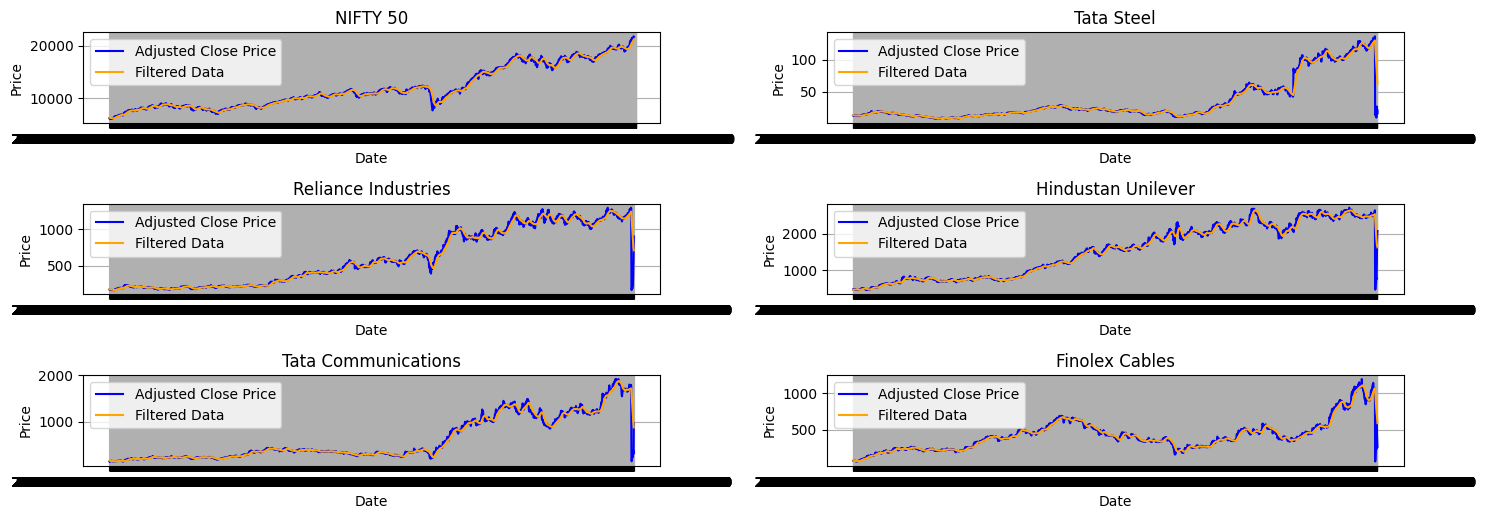

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined dataset
combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)

# Convert to numeric, if necessary
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Apply a 20-tap moving average filter to each column
for column in combined_data.columns:
    combined_data[f'Filtered Data {column}'] = combined_data[column].rolling(window=20).mean()

# Remove the first 20 values from the original data
filtered_combined_data = combined_data.iloc[20:]

# Plotting adjusted close prices and filtered data
plt.figure(figsize=(15, 10))

for i, column in enumerate(filtered_combined_data.columns[:-len(filtered_combined_data.columns) // 2], start=1):
    plt.subplot(len(filtered_combined_data.columns) // 2, 2, i)
    plt.plot(filtered_combined_data.index, filtered_combined_data[column], label='Adjusted Close Price', color='blue')
    plt.plot(filtered_combined_data.index, filtered_combined_data[f'Filtered Data {column}'], label='Filtered Data', color='orange')
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


##(E)

<ipython-input-6-2cf5b98d37f8>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)


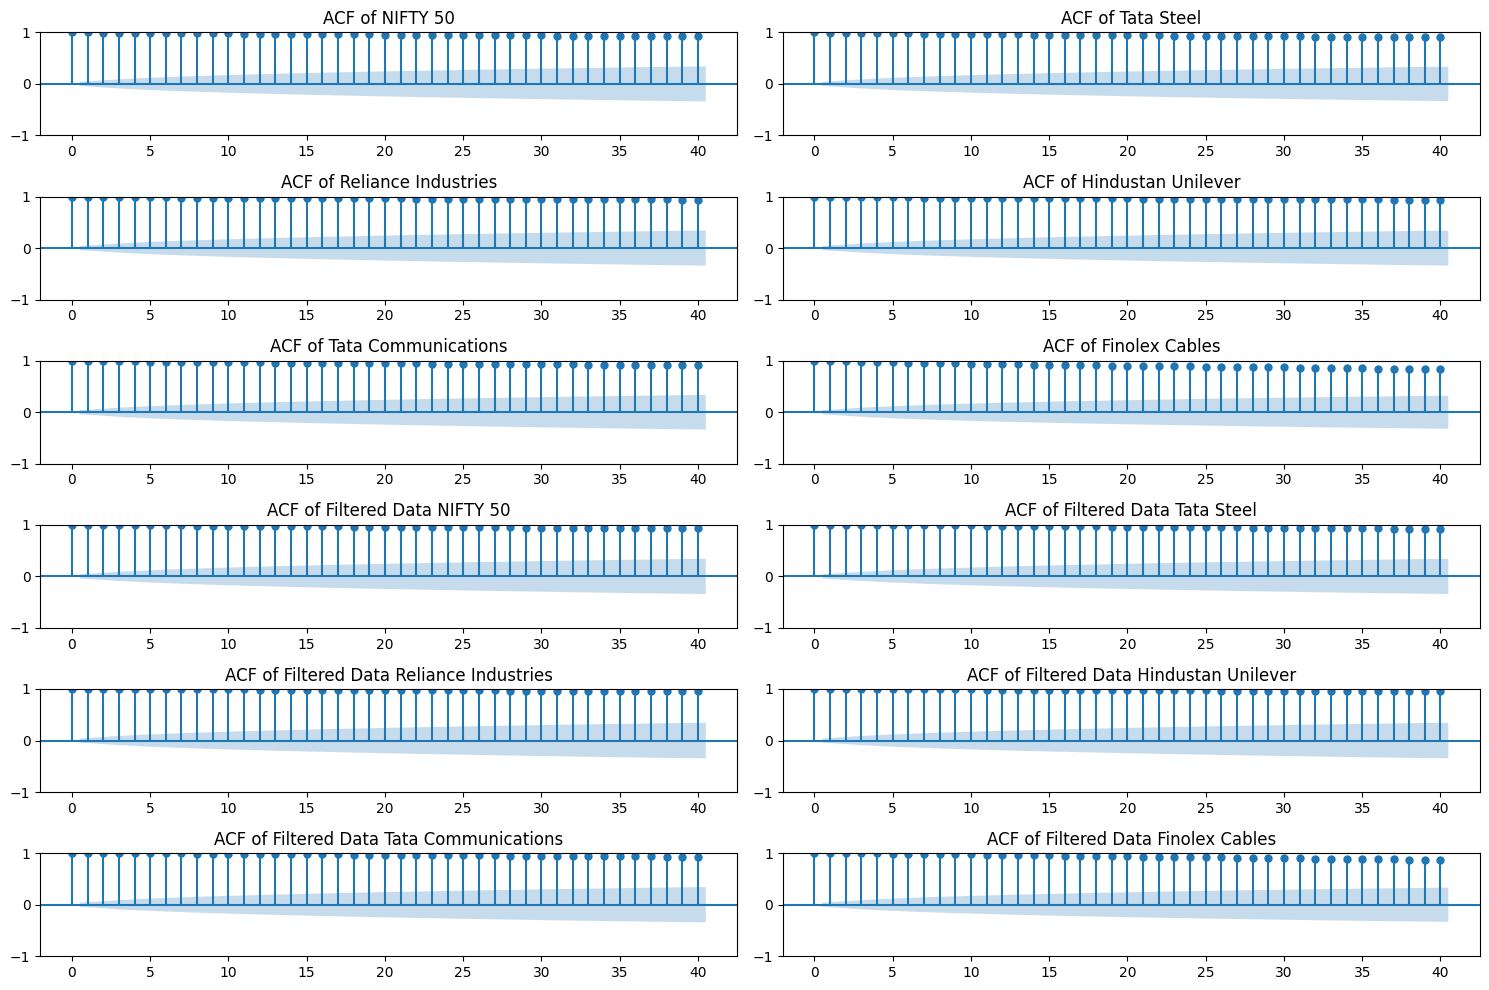

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Read the combined dataset
combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)

# Convert to numeric, if necessary
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Apply a 20-tap moving average filter to each column
for column in combined_data.columns:
    combined_data[f'Filtered Data {column}'] = combined_data[column].rolling(window=20).mean()

# Remove the first 20 values from the original data
filtered_combined_data = combined_data.iloc[20:]

# Plotting ACF for adjusted close prices and filtered data
plt.figure(figsize=(15, 10))

for i, column in enumerate(filtered_combined_data.columns[:-len(filtered_combined_data.columns) // 2], start=1):
    # ACF for adjusted close prices
    plt.subplot(len(filtered_combined_data.columns) // 2, 2, i)
    plot_acf(filtered_combined_data[column].dropna(), lags=40, ax=plt.gca(), title=f'ACF of {column}')

    # ACF for filtered prices
    plt.subplot(len(filtered_combined_data.columns) // 2, 2, i + len(filtered_combined_data.columns) // 2)
    plot_acf(filtered_combined_data[f'Filtered Data {column}'].dropna(), lags=40, ax=plt.gca(), title=f'ACF of Filtered Data {column}')

plt.tight_layout()
plt.show()


##(F)

<ipython-input-7-cac809134d98>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)


Columns in combined data:
Index(['NIFTY 50', 'Tata Steel', 'Reliance Industries', 'Hindustan Unilever',
       'Tata Communications', 'Finolex Cables'],
      dtype='object')


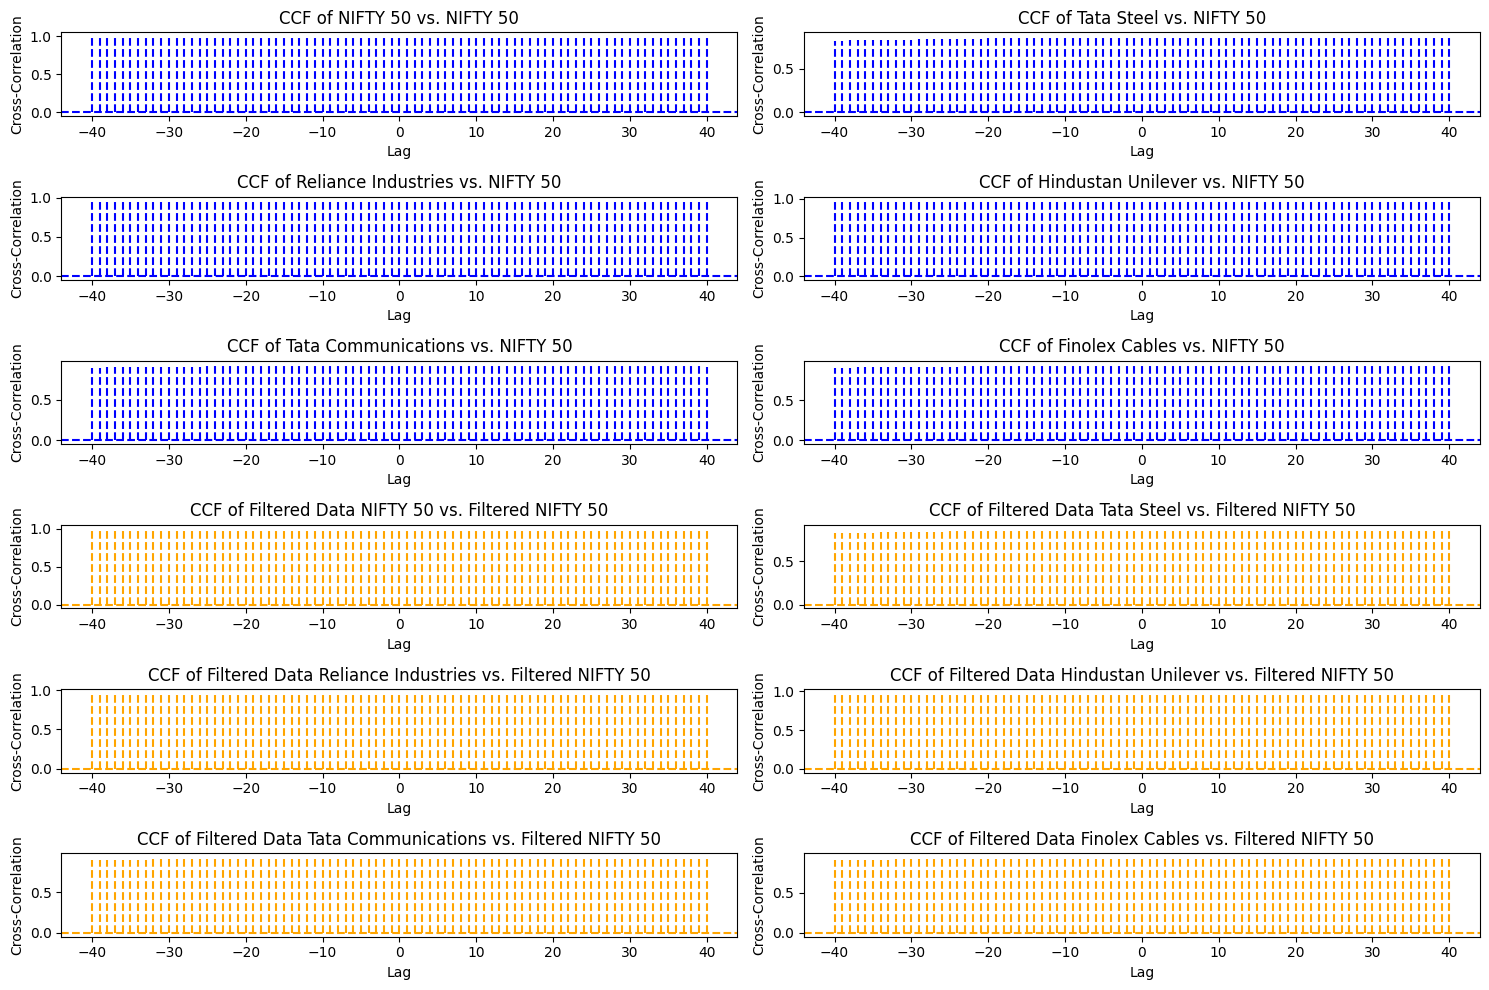

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined dataset
combined_data = pd.read_csv('stock_data_combined.csv', index_col=0, parse_dates=True)

# Check the column names
print("Columns in combined data:")
print(combined_data.columns)

# Convert to numeric, if necessary
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Apply a 20-tap moving average filter to each column
for column in combined_data.columns:
    combined_data[f'Filtered Data {column}'] = combined_data[column].rolling(window=20).mean()

# Remove the first 20 values from the original data
filtered_combined_data = combined_data.iloc[20:]

# Use the correct NIFTY 50 column name
nifty50_column = 'NIFTY 50'  # Updated column name
nifty50 = filtered_combined_data[nifty50_column]  # NIFTY 50 adjusted close prices

# Plotting CCF for original and filtered data
plt.figure(figsize=(15, 10))

for i, column in enumerate(filtered_combined_data.columns[:-len(filtered_combined_data.columns) // 2], start=1):
    # CCF for original adjusted close prices vs. NIFTY 50
    stock_data = filtered_combined_data[column].dropna()
    nifty_data = nifty50[stock_data.index].dropna()  # Align NIFTY 50 data with stock data

    # Make sure both series are of the same length
    min_length = min(len(stock_data), len(nifty_data))
    if min_length > 0:
        plt.subplot(len(filtered_combined_data.columns) // 2, 2, i)
        plt.xcorr(stock_data[:min_length], nifty_data[:min_length], maxlags=40, usevlines=True, linestyle='--', color='blue')
        plt.title(f'CCF of {column} vs. NIFTY 50')
        plt.xlabel('Lag')
        plt.ylabel('Cross-Correlation')

    # CCF for filtered prices vs. Filtered NIFTY 50 prices
    filtered_stock_data = filtered_combined_data[f'Filtered Data {column}'].dropna()
    filtered_nifty_data = filtered_combined_data[f'Filtered Data {nifty50_column}'][filtered_stock_data.index].dropna()  # Align filtered NIFTY 50 data

    # Make sure both series are of the same length
    filtered_min_length = min(len(filtered_stock_data), len(filtered_nifty_data))
    if filtered_min_length > 0:
        plt.subplot(len(filtered_combined_data.columns) // 2, 2, i + len(filtered_combined_data.columns) // 2)
        plt.xcorr(filtered_stock_data[:filtered_min_length], filtered_nifty_data[:filtered_min_length], maxlags=40, usevlines=True, linestyle='--', color='orange')
        plt.title(f'CCF of Filtered Data {column} vs. Filtered NIFTY 50')
        plt.xlabel('Lag')
        plt.ylabel('Cross-Correlation')

plt.tight_layout()
plt.show()


##(G)

In [8]:
pip install prophet

In [12]:
import pandas as pd
from prophet import Prophet

# Step 1: Load the CSV with no headers (treating the first row as data)
combined_data = pd.read_csv('stock_data_combined.csv', header=None)

# Step 2: Set the first row as the header
combined_data.columns = combined_data.iloc[0]
combined_data = combined_data.drop(0).reset_index(drop=True)

# Step 3: Rename the first column to "Date"
combined_data = combined_data.rename(columns={combined_data.columns[0]: "Date"})

# Convert "Date" column to datetime format and remove timezone
combined_data["Date"] = pd.to_datetime(combined_data["Date"], errors='coerce').dt.tz_localize(None)

# Step 4: Prepare data for Prophet model
prophet_data = pd.DataFrame()

# Process each stock column for Prophet
for column in combined_data.columns[1:]:  # Skip the 'Date' column
    # Prepare data for Prophet
    temp_df = pd.DataFrame({
        'ds': combined_data["Date"],
        'y': pd.to_numeric(combined_data[column], errors='coerce')
    })
    temp_df.dropna(inplace=True)

    if temp_df['y'].notnull().sum() < 2:
        print(f"Not enough valid data for {column}. Skipping.")
        continue

    prophet_data = pd.concat([prophet_data, temp_df], ignore_index=True)

# Step 5: Save the processed data for Prophet to a CSV file
prophet_data.to_csv('prophet_data.csv', index=False)
print("Processed Data for Prophet:\n", prophet_data.head())

# Step 6: Run Prophet for one-step predictions
predictions = {}
for column in combined_data.columns[1:]:
    stock_data = prophet_data[prophet_data['ds'].isin(temp_df['ds'])].copy()

    if stock_data.shape[0] < 2:
        print(f"Skipping {column} due to insufficient data.")
        continue

    model = Prophet()
    model.fit(stock_data)

    future = model.make_future_dataframe(periods=1)
    forecast = model.predict(future)
    predictions[column] = forecast['yhat'].iloc[-1]

# Display predictions
print("One-step predictions:")
for stock, prediction in predictions.items():
    print(f"{stock}: {prediction}")


<ipython-input-12-77b84a86be38>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data["Date"] = pd.to_datetime(combined_data["Date"], errors='coerce').dt.tz_localize(None)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/km52w5p9.json


Processed Data for Prophet:
           ds            y
0 2014-01-02  6221.149902
1 2014-01-03  6211.149902
2 2014-01-06  6191.450195
3 2014-01-07  6162.250000
4 2014-01-08  6174.600098


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/gogeicqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35314', 'data', 'file=/tmp/tmpjoyn5xjp/km52w5p9.json', 'init=/tmp/tmpjoyn5xjp/gogeicqp.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_modelffumhque/prophet_model-20241028114527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:45:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/8qzjv1ix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/g7du6ebz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

One-step predictions:
NIFTY 50: 2440.3899676910505
Tata Steel: 2440.3899676910505
Reliance Industries: 2440.3899676910505
Hindustan Unilever: 2440.3899676910505
Tata Communications: 2440.3899676910505
Finolex Cables: 2440.3899676910505


##EXPERIMENT-8(A)

In [13]:
import pandas as pd

# Step 1: Load the original combined dataset
combined_data = pd.read_csv('stock_data_combined.csv', header=None)

# Step 2: Set the first row as the header and rename the first column to "Date"
combined_data.columns = combined_data.iloc[0]
combined_data = combined_data.drop(0).reset_index(drop=True)
combined_data = combined_data.rename(columns={combined_data.columns[0]: "Date"})

# Convert "Date" column to datetime format
combined_data["Date"] = pd.to_datetime(combined_data["Date"], errors='coerce')

# Ensure numerical values for stock columns
for column in combined_data.columns[1:]:
    combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce')

# Step 3: Calculate daily returns for each stock
daily_returns = pd.DataFrame()
daily_returns['Date'] = combined_data['Date']

for column in combined_data.columns[1:]:
    daily_returns[column] = combined_data[column].pct_change()

# Step 4: Drop the first row as it will have NaN values due to differencing
daily_returns.dropna(inplace=True)

# Step 5: Display the resulting daily return ratios for original data
print("Daily Return Ratios (Original Data):")
print(daily_returns.head())

# Step 6: Save daily return ratios to CSV for both original and filtered data if needed
daily_returns.to_csv('daily_returns_original.csv', index=False)


<ipython-input-13-a467aa79233e>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data["Date"] = pd.to_datetime(combined_data["Date"], errors='coerce')
<ipython-input-13-a467aa79233e>:23: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns[column] = combined_data[column].pct_change()


Daily Return Ratios (Original Data):
                       Date  NIFTY 50  Tata Steel  Reliance Industries  \
3 2014-01-03 00:00:00+00:00 -0.001607   -0.015983            -0.012286   
4 2014-01-06 00:00:00+00:00 -0.003172   -0.010182            -0.010761   
5 2014-01-07 00:00:00+00:00 -0.004716   -0.033309            -0.015030   
6 2014-01-08 00:00:00+00:00  0.002004   -0.005827             0.008253   
7 2014-01-09 00:00:00+00:00 -0.001012   -0.004077             0.001943   

   Hindustan Unilever  Tata Communications  Finolex Cables  
3            0.004623             0.032027        0.063981  
4           -0.002655             0.018911       -0.005568  
5           -0.008075            -0.002538       -0.031355  
6            0.000358            -0.013359       -0.003468  
7           -0.008942            -0.022889       -0.016821  


##(B)

In [14]:
import pandas as pd

# Load daily return ratios dataset
daily_returns = pd.read_csv('daily_returns_original.csv', parse_dates=['Date'])

# Display the loaded data structure to confirm
print("Loaded Daily Return Ratios Dataset:")
print(daily_returns.head())

Loaded Daily Return Ratios Dataset:
                       Date  NIFTY 50  Tata Steel  Reliance Industries  \
0 2014-01-03 00:00:00+00:00 -0.001607   -0.015983            -0.012286   
1 2014-01-06 00:00:00+00:00 -0.003172   -0.010182            -0.010761   
2 2014-01-07 00:00:00+00:00 -0.004716   -0.033309            -0.015030   
3 2014-01-08 00:00:00+00:00  0.002004   -0.005827             0.008253   
4 2014-01-09 00:00:00+00:00 -0.001012   -0.004077             0.001943   

   Hindustan Unilever  Tata Communications  Finolex Cables  
0            0.004623             0.032027        0.063981  
1           -0.002655             0.018911       -0.005568  
2           -0.008075            -0.002538       -0.031355  
3            0.000358            -0.013359       -0.003468  
4           -0.008942            -0.022889       -0.016821  


##(C)

In [23]:
# Step (c): Apply a 20-tap moving average filter to each stock's adjusted close price.
# Avoid duplicate "Filtered" prefix by checking if the column already exists.

for column in daily_returns.columns:
    if column != 'Date':  # Skip the Date column
        # Check if the filtered column already exists
        filtered_column_name = f'Filtered {column}'
        if filtered_column_name not in daily_returns.columns:
            daily_returns[filtered_column_name] = daily_returns[column].rolling(window=20).mean()

# Drop the first 20 rows with NaN values and reset the index
filtered_daily_returns = daily_returns.dropna().reset_index(drop=True)

##(D)

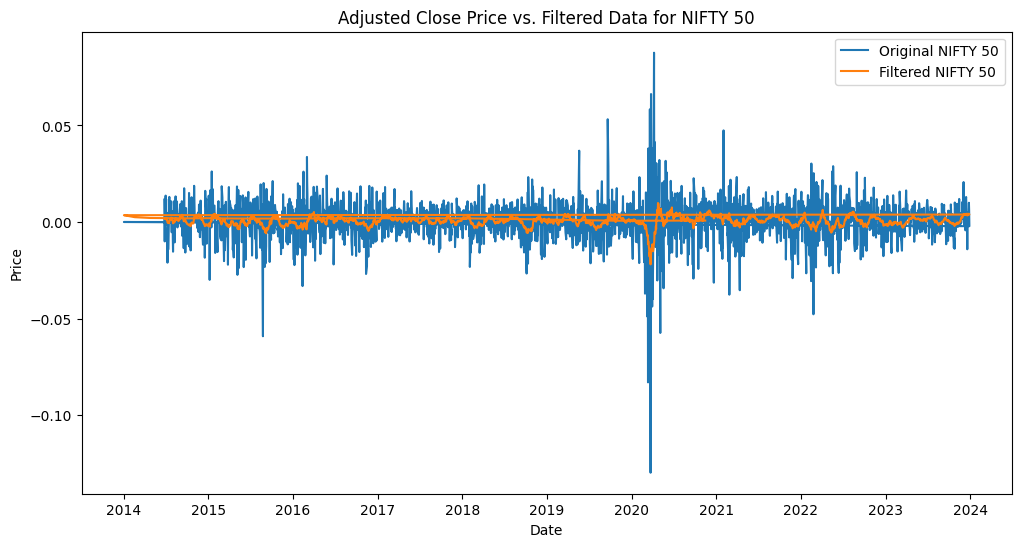

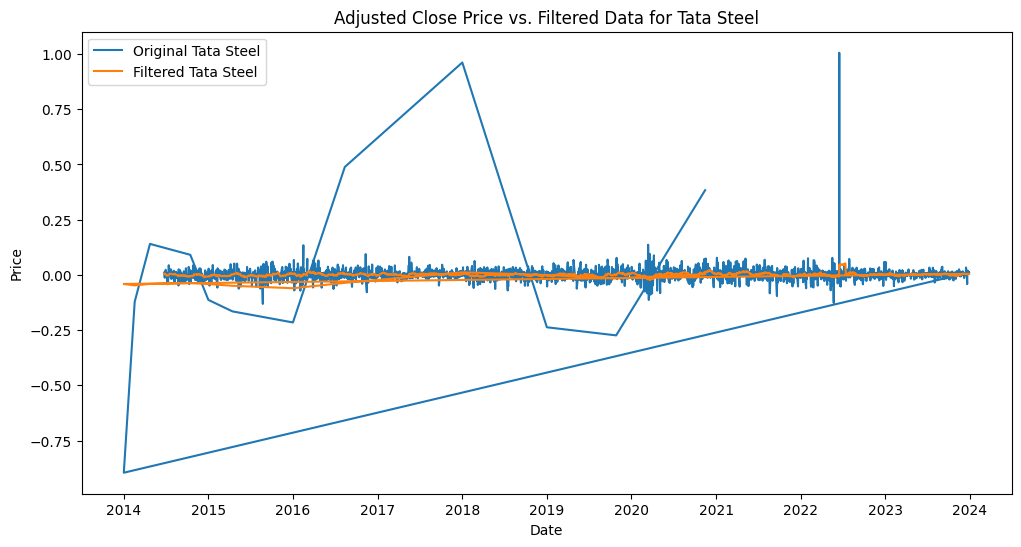

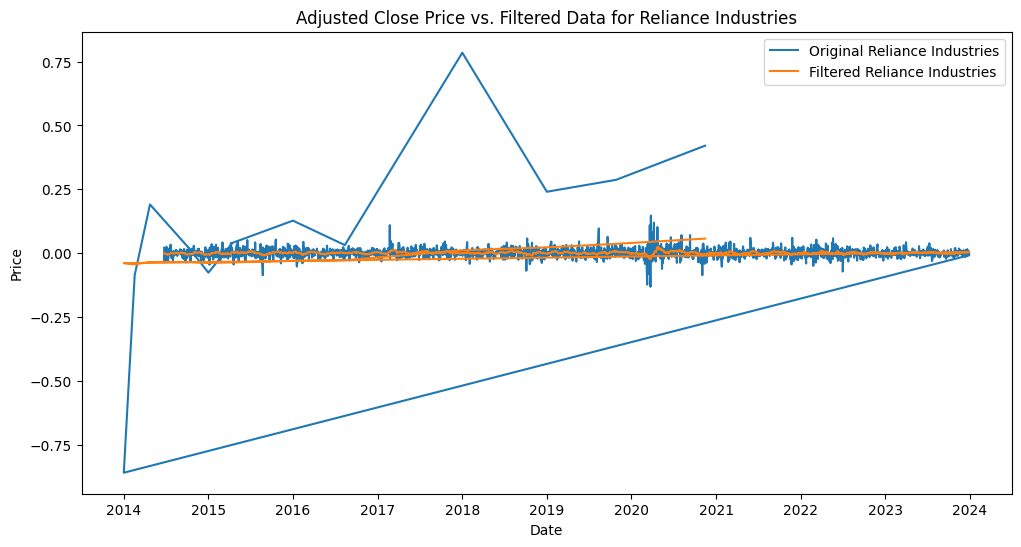

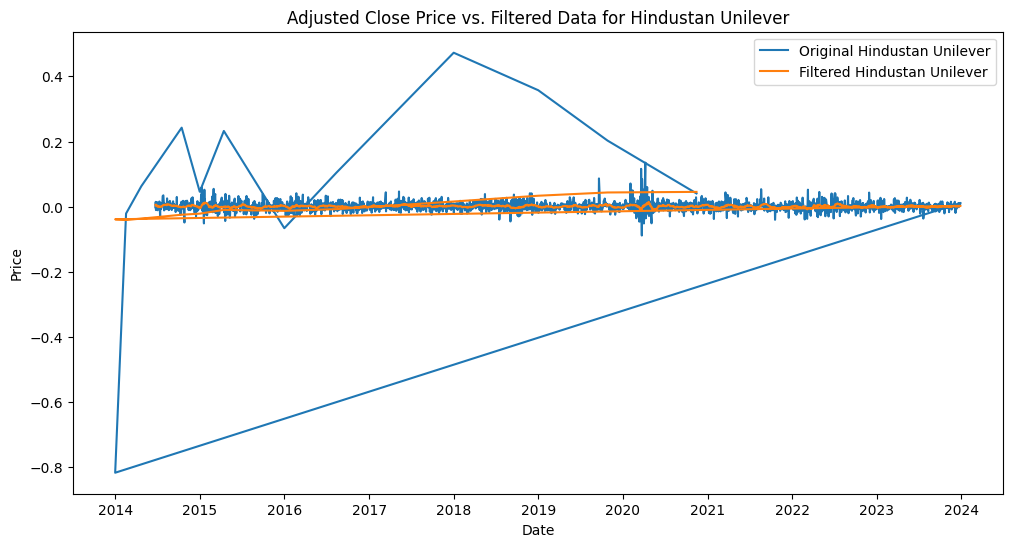

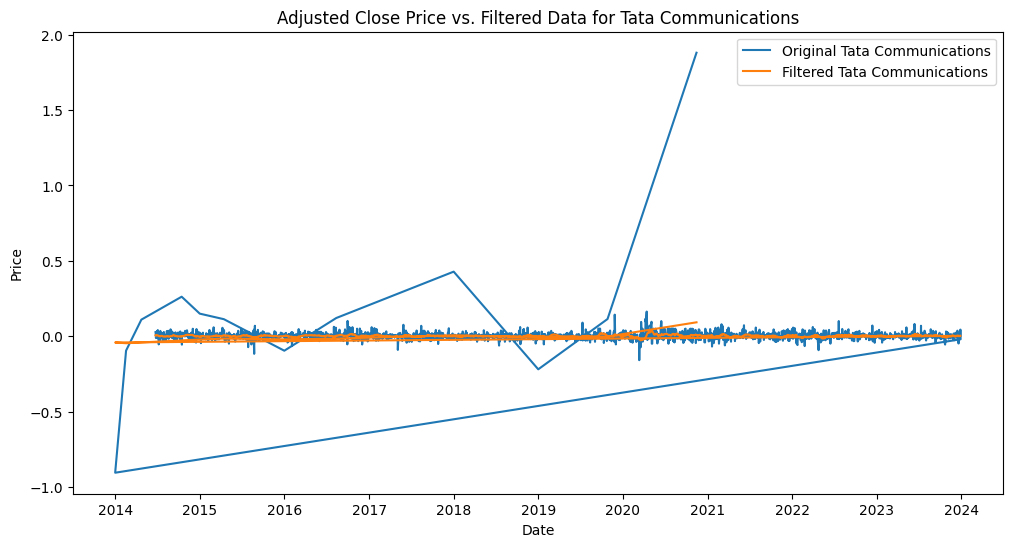

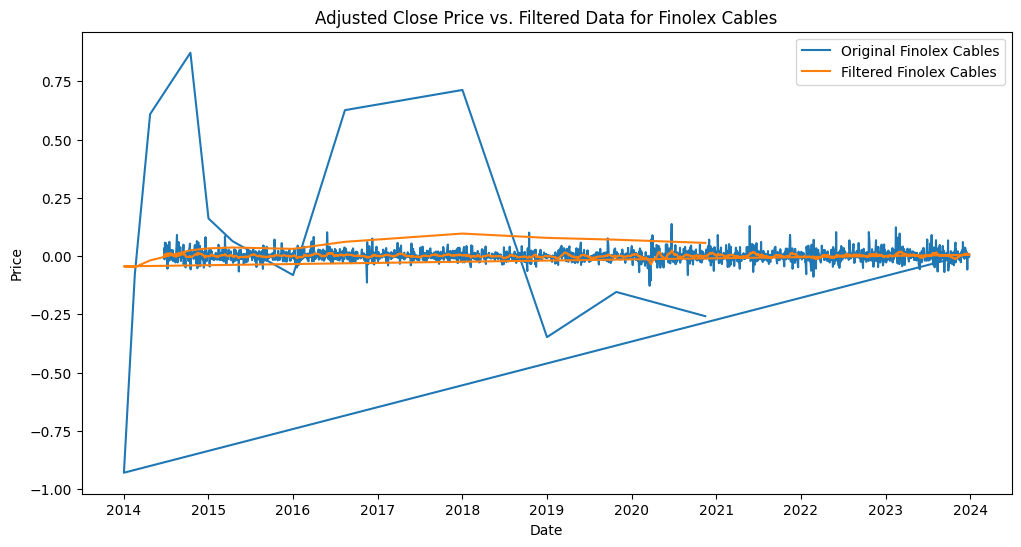

In [24]:
import matplotlib.pyplot as plt

# Plot adjusted close price and filtered data for each stock
for column in filtered_daily_returns.columns:
    if column != 'Date' and not column.startswith('Filtered'):  # Process only original columns
        filtered_column_name = f'Filtered {column}'

        # Plot the original and filtered data
        plt.figure(figsize=(12, 6))
        plt.plot(filtered_daily_returns['Date'], filtered_daily_returns[column], label=f'Original {column}')
        plt.plot(filtered_daily_returns['Date'], filtered_daily_returns[filtered_column_name], label=f'Filtered {column}')

        plt.title(f'Adjusted Close Price vs. Filtered Data for {column}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

##(E)

<Figure size 1200x600 with 0 Axes>

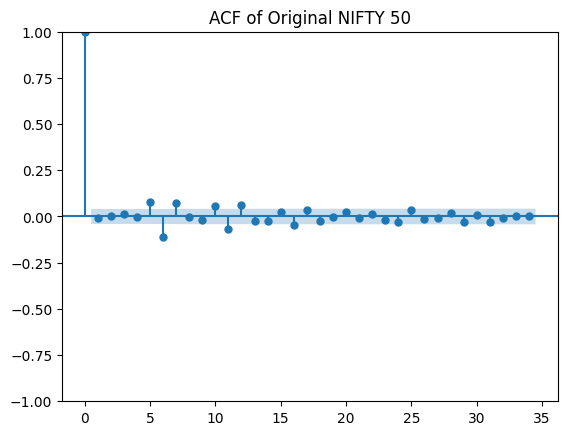

<Figure size 1200x600 with 0 Axes>

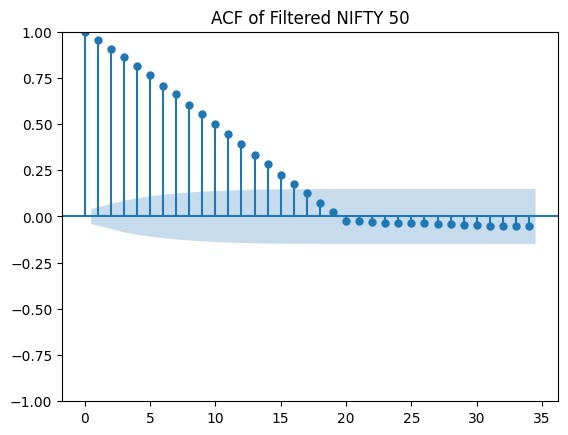

<Figure size 1200x600 with 0 Axes>

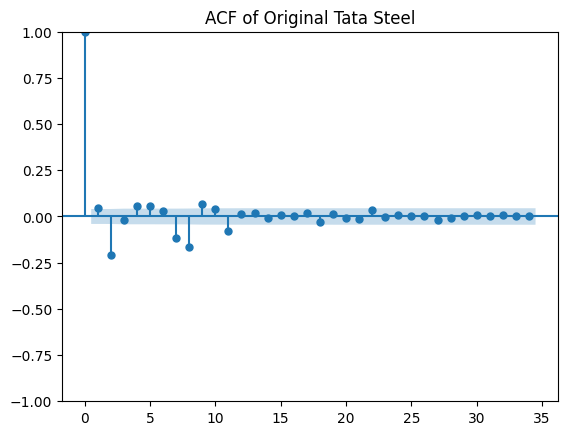

<Figure size 1200x600 with 0 Axes>

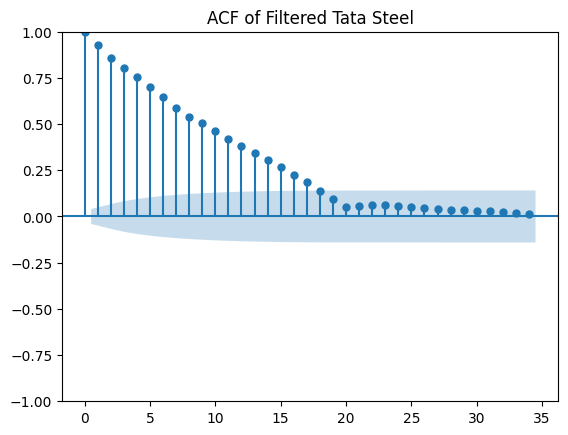

<Figure size 1200x600 with 0 Axes>

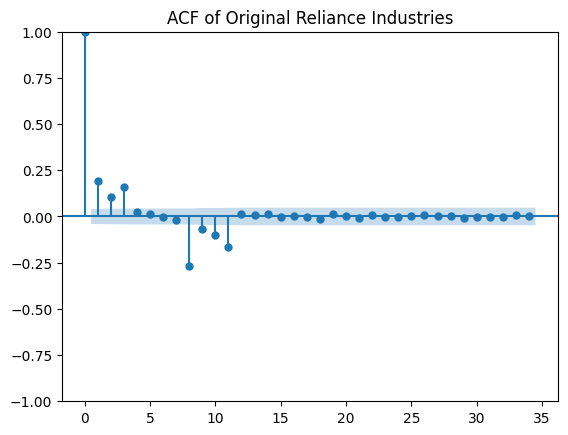

<Figure size 1200x600 with 0 Axes>

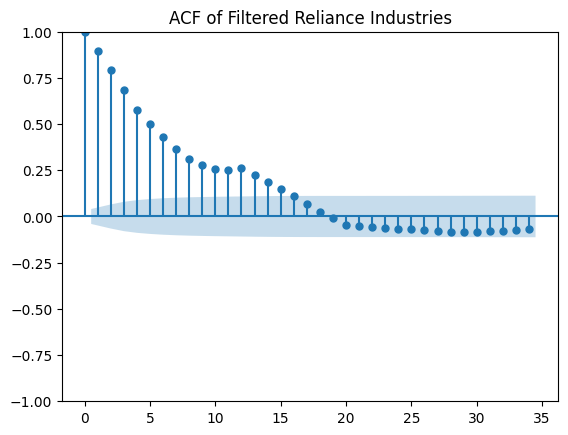

<Figure size 1200x600 with 0 Axes>

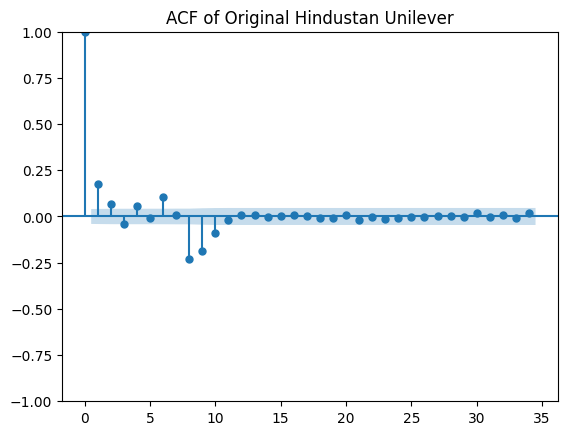

<Figure size 1200x600 with 0 Axes>

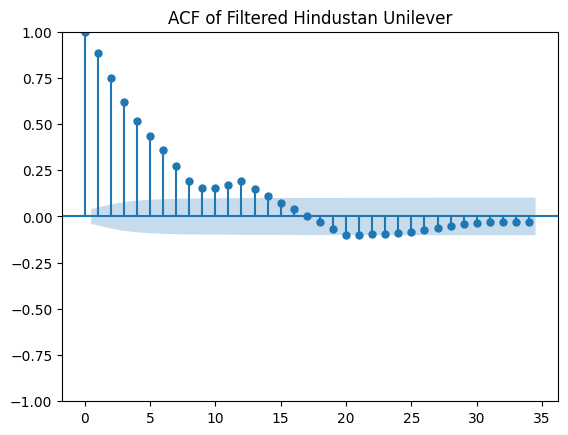

<Figure size 1200x600 with 0 Axes>

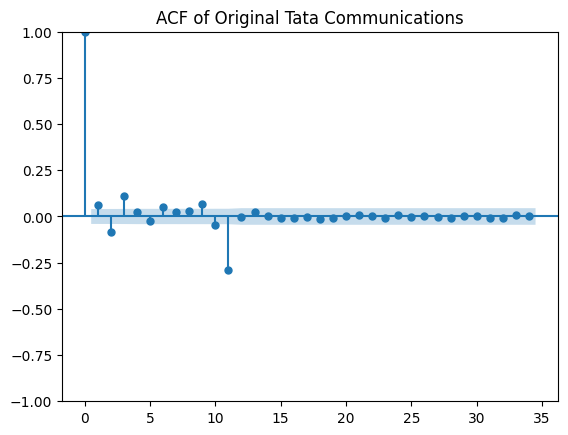

<Figure size 1200x600 with 0 Axes>

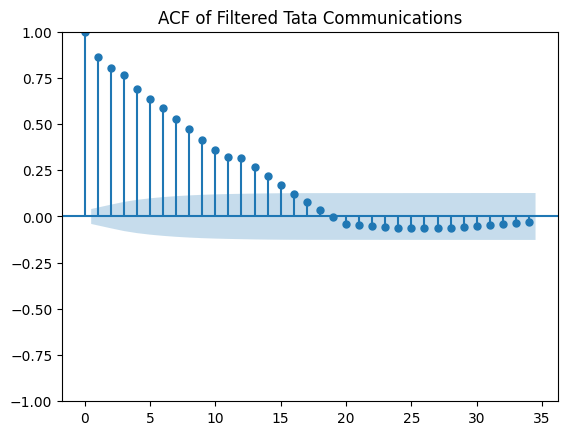

<Figure size 1200x600 with 0 Axes>

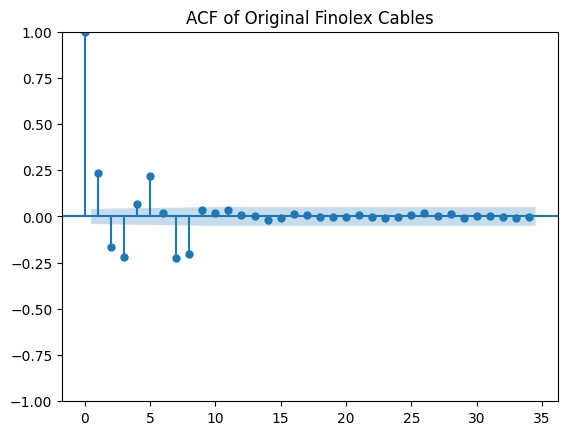

<Figure size 1200x600 with 0 Axes>

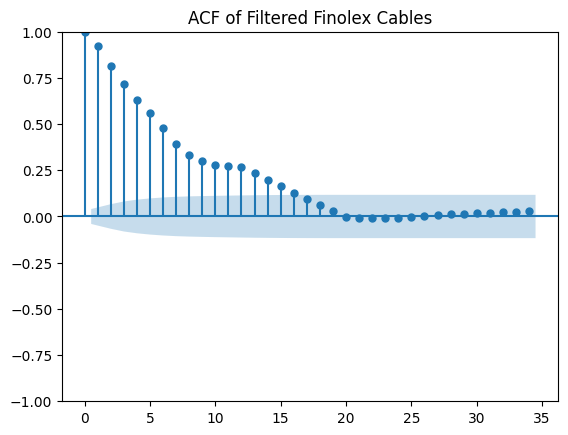

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF plots for each stock's adjusted close price and its filtered version
for column in filtered_daily_returns.columns:
    if column != 'Date' and not column.startswith('Filtered'):  # Only original data
        filtered_column_name = f'Filtered {column}'

        # ACF for original adjusted close price
        plt.figure(figsize=(12, 6))
        plot_acf(filtered_daily_returns[column].dropna(), title=f'ACF of Original {column}')
        plt.show()

        # ACF for filtered adjusted close price
        plt.figure(figsize=(12, 6))
        plot_acf(filtered_daily_returns[filtered_column_name].dropna(), title=f'ACF of Filtered {column}')
        plt.show()

##(F)

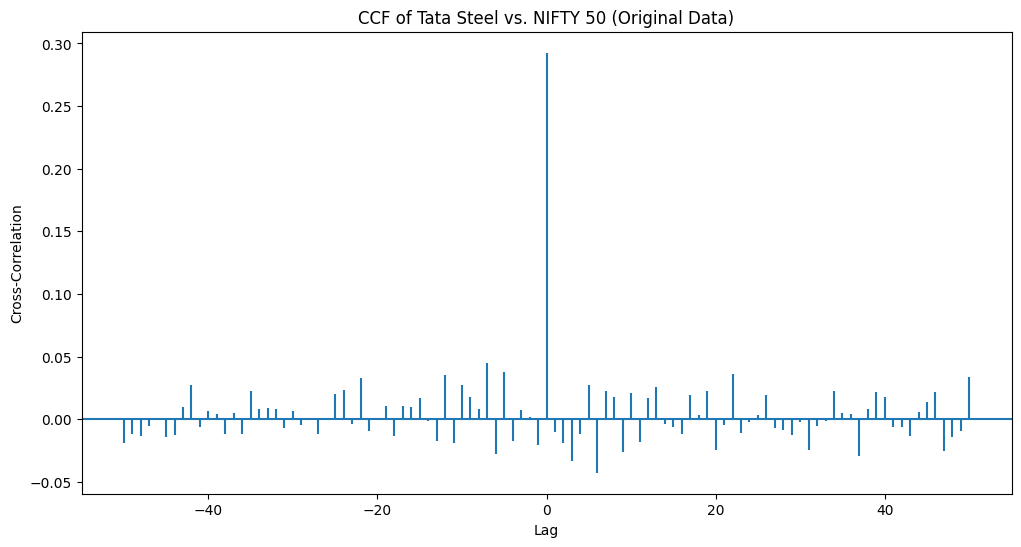

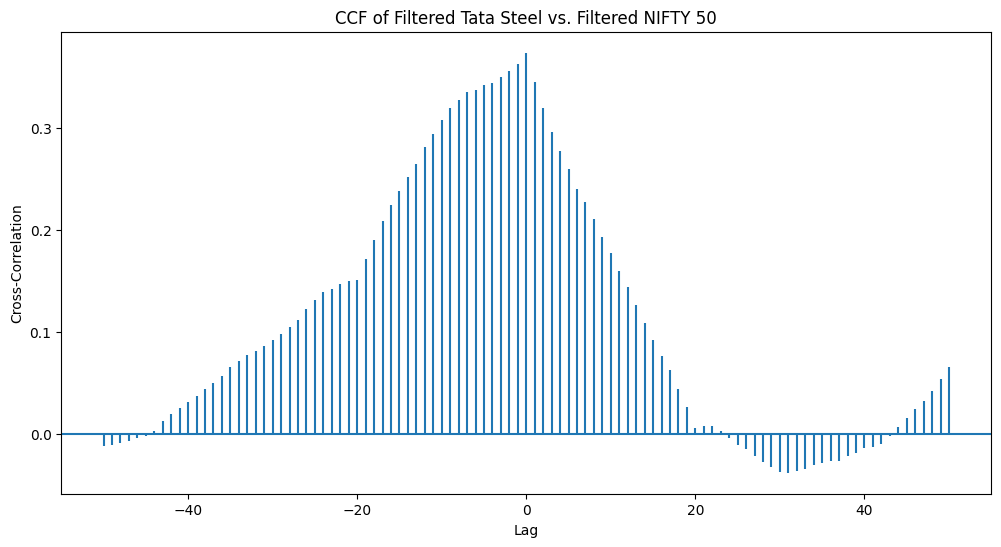

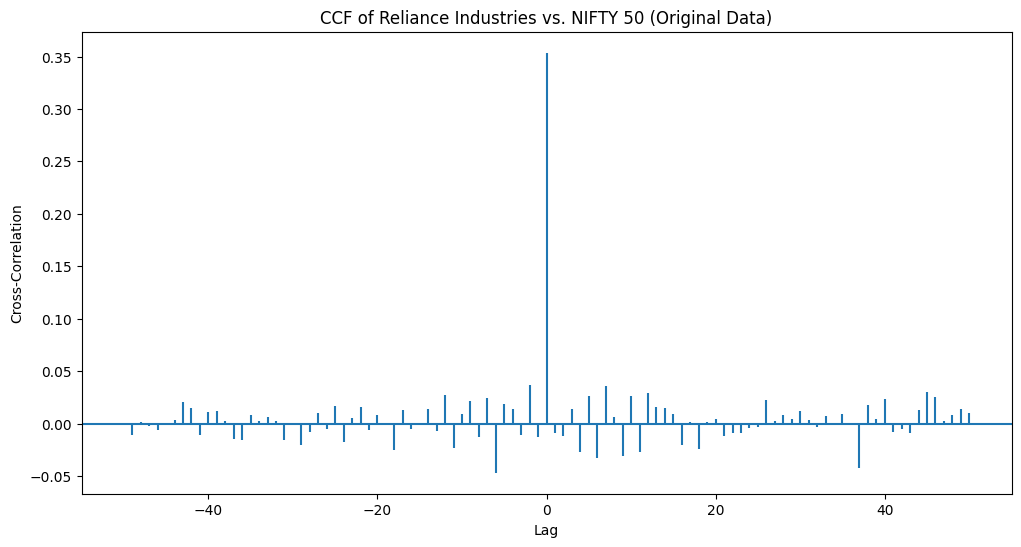

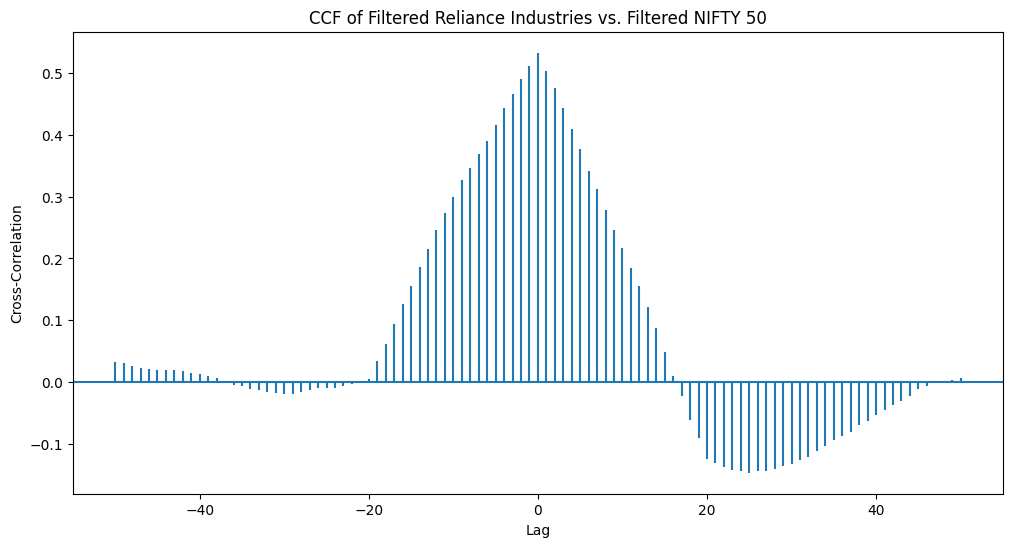

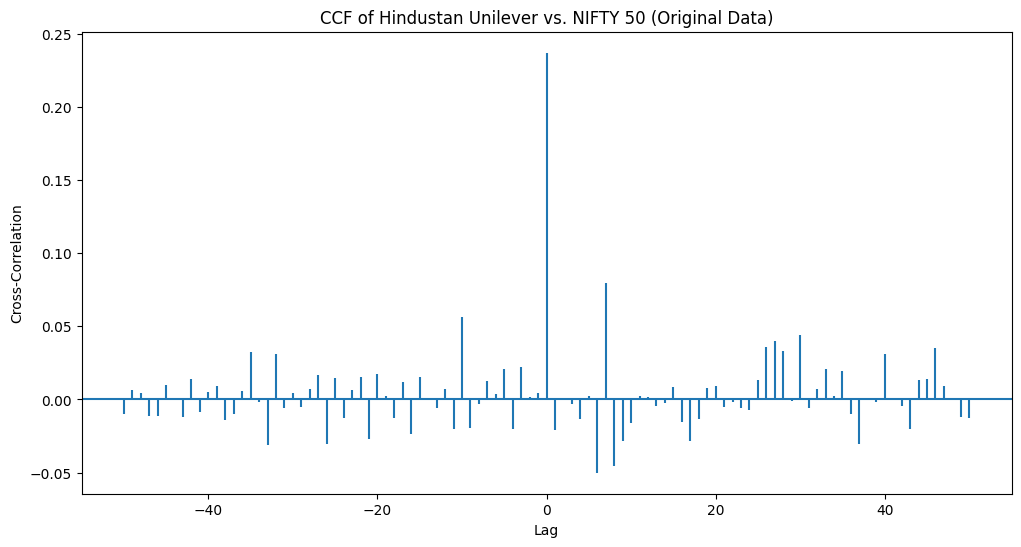

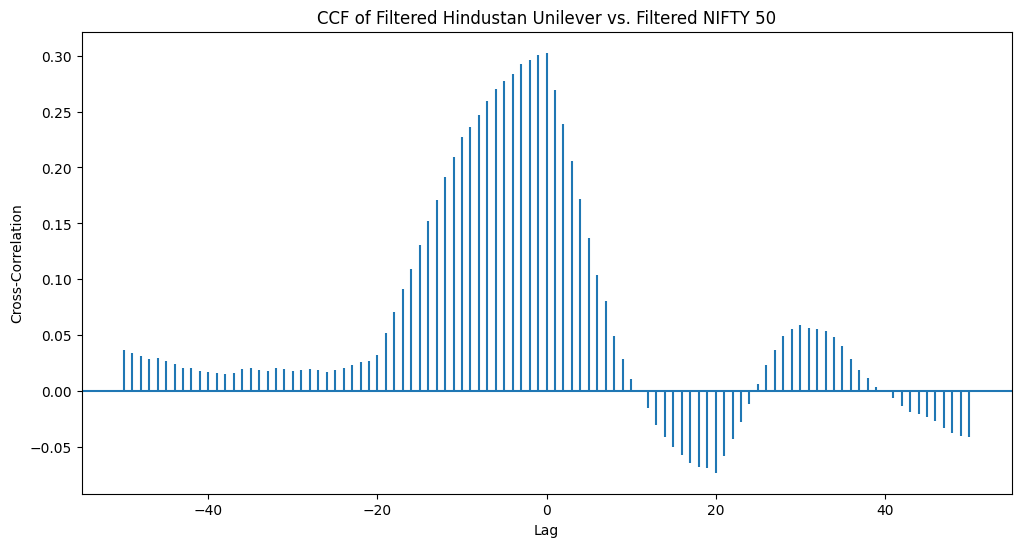

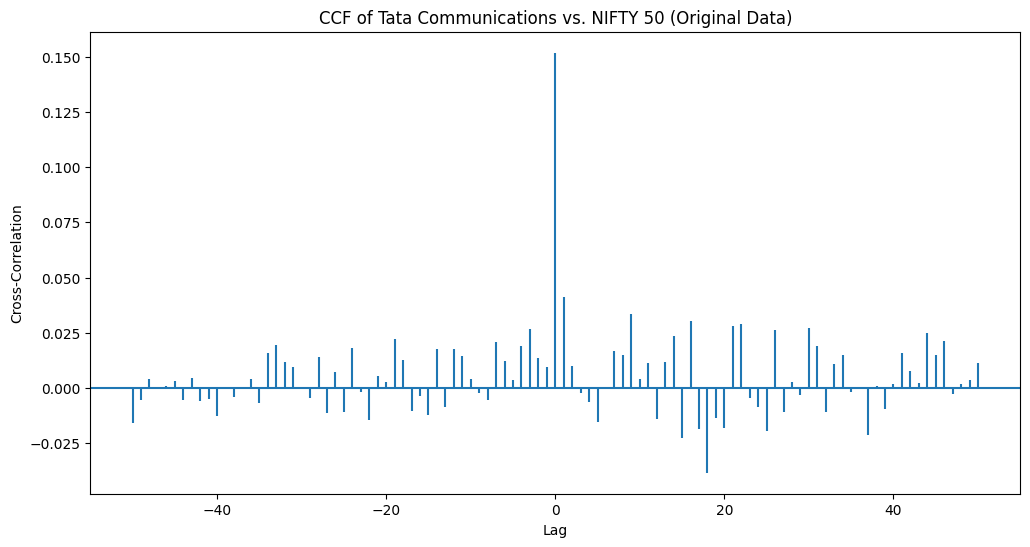

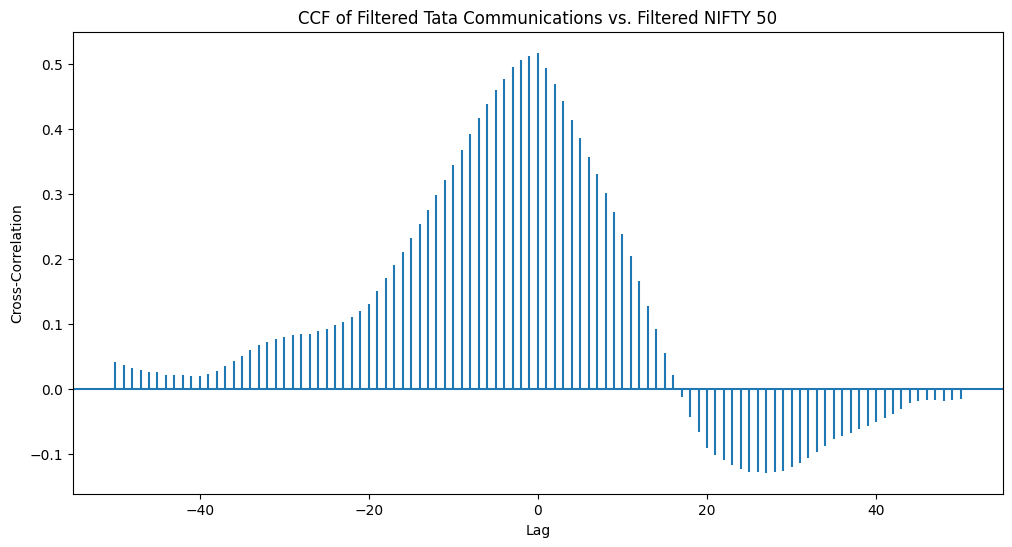

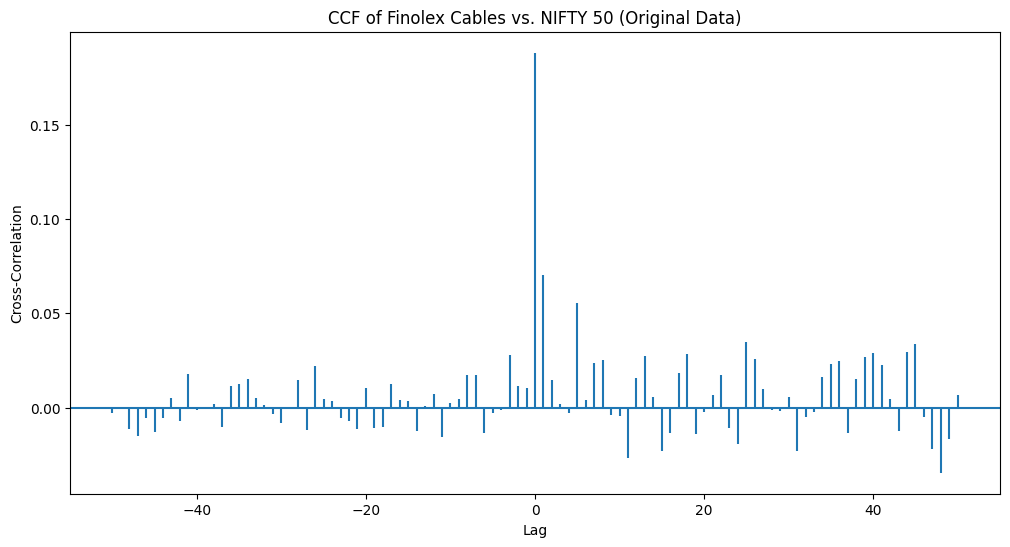

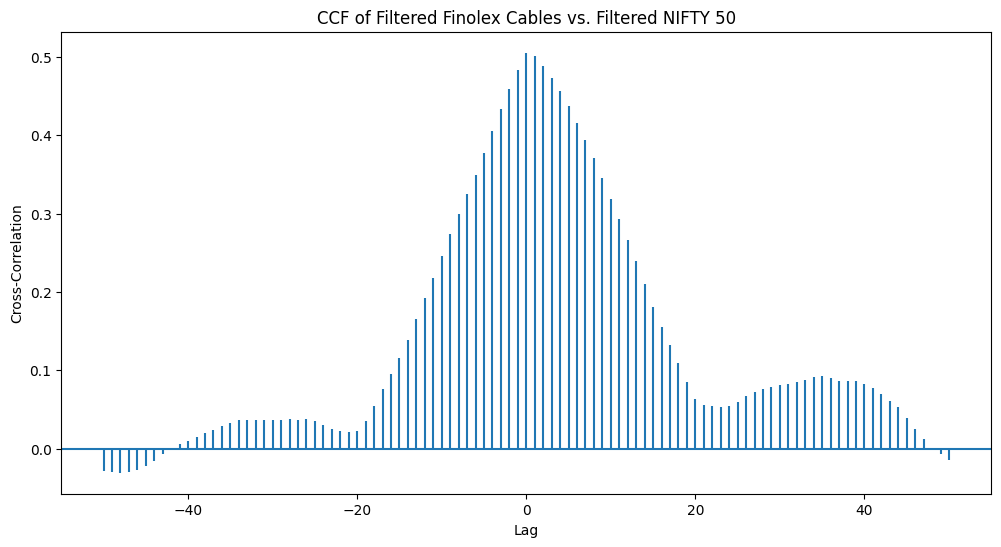

In [26]:
# Assuming 'NIFTY 50' is the main reference index for cross-correlation
nifty_column = 'NIFTY 50'

for column in filtered_daily_returns.columns:
    if column != 'Date' and column != nifty_column and not column.startswith('Filtered'):
        # CCF for original data with NIFTY 50
        plt.figure(figsize=(12, 6))
        plt.xcorr(filtered_daily_returns[column].dropna(), filtered_daily_returns[nifty_column].dropna(), maxlags=50)
        plt.title(f'CCF of {column} vs. {nifty_column} (Original Data)')
        plt.xlabel('Lag')
        plt.ylabel('Cross-Correlation')
        plt.show()

        # CCF for filtered data with filtered NIFTY 50
        filtered_column_name = f'Filtered {column}'
        plt.figure(figsize=(12, 6))
        plt.xcorr(filtered_daily_returns[filtered_column_name].dropna(), filtered_daily_returns[f'Filtered {nifty_column}'].dropna(), maxlags=50)
        plt.title(f'CCF of {filtered_column_name} vs. Filtered {nifty_column}')
        plt.xlabel('Lag')
        plt.ylabel('Cross-Correlation')
        plt.show()

##(G)

In [28]:
from prophet import Prophet
import pandas as pd

# Directory to save generated CSV files
output_dir = '/mnt/data/prophet_forecasts/'  # Change to your desired path

# Ensure the directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create CSV and make a one-step forecast
def prepare_and_forecast(data, stock_name):
    # Prepare the dataframe with 'ds' and 'y' columns for Prophet
    prophet_data = data[['Date', stock_name]].rename(columns={'Date': 'ds', stock_name: 'y'})

    # Remove timezone information
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)

    # Save the data to CSV
    csv_path = os.path.join(output_dir, f'{stock_name}_prophet_data.csv')
    prophet_data.to_csv(csv_path, index=False)

    # Train Prophet model
    model = Prophet()
    model.fit(prophet_data)

    # Make a one-step future dataframe
    future = model.make_future_dataframe(periods=1)
    forecast = model.predict(future)

    # Display forecast
    forecasted_value = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)
    print(f"Forecast for {stock_name}:")
    print(forecasted_value)

# Loop through each stock in the original dataset (excluding 'Date' and filtered columns)
for column in filtered_daily_returns.columns:
    if column != 'Date' and not column.startswith('Filtered'):
        prepare_and_forecast(filtered_daily_returns, column)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/il7p9a92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/e701hvr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53316', 'data', 'file=/tmp/tmpjoyn5xjp/il7p9a92.json', 'init=/tmp/tmpjoyn5xjp/e701hvr2.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_modelqexud6c0/prophet_model-20241028120917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjo

Forecast for NIFTY 50:
             ds      yhat  yhat_lower  yhat_upper
2350 2023-12-30  0.001135   -0.011816    0.013879


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/uqbnad6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71810', 'data', 'file=/tmp/tmpjoyn5xjp/m0jl24ir.json', 'init=/tmp/tmpjoyn5xjp/uqbnad6q.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_model2zij9srp/prophet_model-20241028120918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/pzpyak6j.json


Forecast for Tata Steel:
             ds      yhat  yhat_lower  yhat_upper
2350 2023-12-30  0.382613    0.329606    0.431764


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/vyvg7log.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23432', 'data', 'file=/tmp/tmpjoyn5xjp/pzpyak6j.json', 'init=/tmp/tmpjoyn5xjp/vyvg7log.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_modelf7217lgr/prophet_model-20241028120919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/avbhgzq7.json


Forecast for Reliance Industries:
             ds      yhat  yhat_lower  yhat_upper
2350 2023-12-30  0.423048    0.384494    0.459512


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/awzajbcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81329', 'data', 'file=/tmp/tmpjoyn5xjp/avbhgzq7.json', 'init=/tmp/tmpjoyn5xjp/awzajbcx.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_modelbpbehc7t/prophet_model-20241028120921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/wn8yimix.json


Forecast for Hindustan Unilever:
             ds      yhat  yhat_lower  yhat_upper
2350 2023-12-30  0.040947    0.005325    0.073677


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/a8wt285w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14398', 'data', 'file=/tmp/tmpjoyn5xjp/wn8yimix.json', 'init=/tmp/tmpjoyn5xjp/a8wt285w.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_modelhernulks/prophet_model-20241028120922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/hfr5c8ju.json


Forecast for Tata Communications:
             ds      yhat  yhat_lower  yhat_upper
2350 2023-12-30  1.874699    1.838469    1.914927


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoyn5xjp/sv0fzjs0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85788', 'data', 'file=/tmp/tmpjoyn5xjp/hfr5c8ju.json', 'init=/tmp/tmpjoyn5xjp/sv0fzjs0.json', 'output', 'file=/tmp/tmpjoyn5xjp/prophet_model1wdi3vxe/prophet_model-20241028120924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for Finolex Cables:
             ds      yhat  yhat_lower  yhat_upper
2350 2023-12-30 -0.255812    -0.31222   -0.201119
